In [1]:
import pandas
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, classification_report, precision_score, recall_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pydotplus
from sklearn import tree
from IPython.display import Image, display
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score

In [114]:

df = pandas.read_csv("credit_default_corrected_train.csv")

df = df[['ps-sep', 'ps-aug', 'ps-jul', 'ps-jun', 'ps-may', 'ps-apr', 'credit_default']]
attributes = [col for col in df.columns if col != 'credit_default']
X = df[attributes].values
y = df['credit_default']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=100, 
                                                    stratify=y)

clf = DecisionTreeClassifier(criterion='gini', min_samples_split=150, min_samples_leaf=20, max_depth=7, presort=True)

In [115]:
clf.fit(X, y)

scores = cross_val_score(clf, X, y, cv=10)

scores = cross_val_score(clf, X, y, cv=10, scoring='f1_macro')
print('F1-score: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

scores = cross_val_score(clf, X, y, cv=10, scoring='recall_macro')
print('rec: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

scores = cross_val_score(clf, X, y, cv=10, scoring='precision_macro')
print('prec: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

clf.fit(X_train, y_train)

y_pred = clf.predict(X_train)
print('Accuracy train %s' % accuracy_score(y_train, y_pred))
print(classification_report(y_train, y_pred))

y_pred = clf.predict(X_test)
print('Accuracy test %s' % accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

F1-score: 0.6864 (+/- 0.04)
rec: 0.6617 (+/- 0.04)
prec: 0.7568 (+/- 0.03)
Accuracy train 0.825866666667
             precision    recall  f1-score   support

          0       0.85      0.95      0.89      5841
          1       0.69      0.39      0.50      1659

avg / total       0.81      0.83      0.81      7500

Accuracy test 0.8176
             precision    recall  f1-score   support

          0       0.84      0.94      0.89      1947
          1       0.65      0.38      0.48       553

avg / total       0.80      0.82      0.80      2500



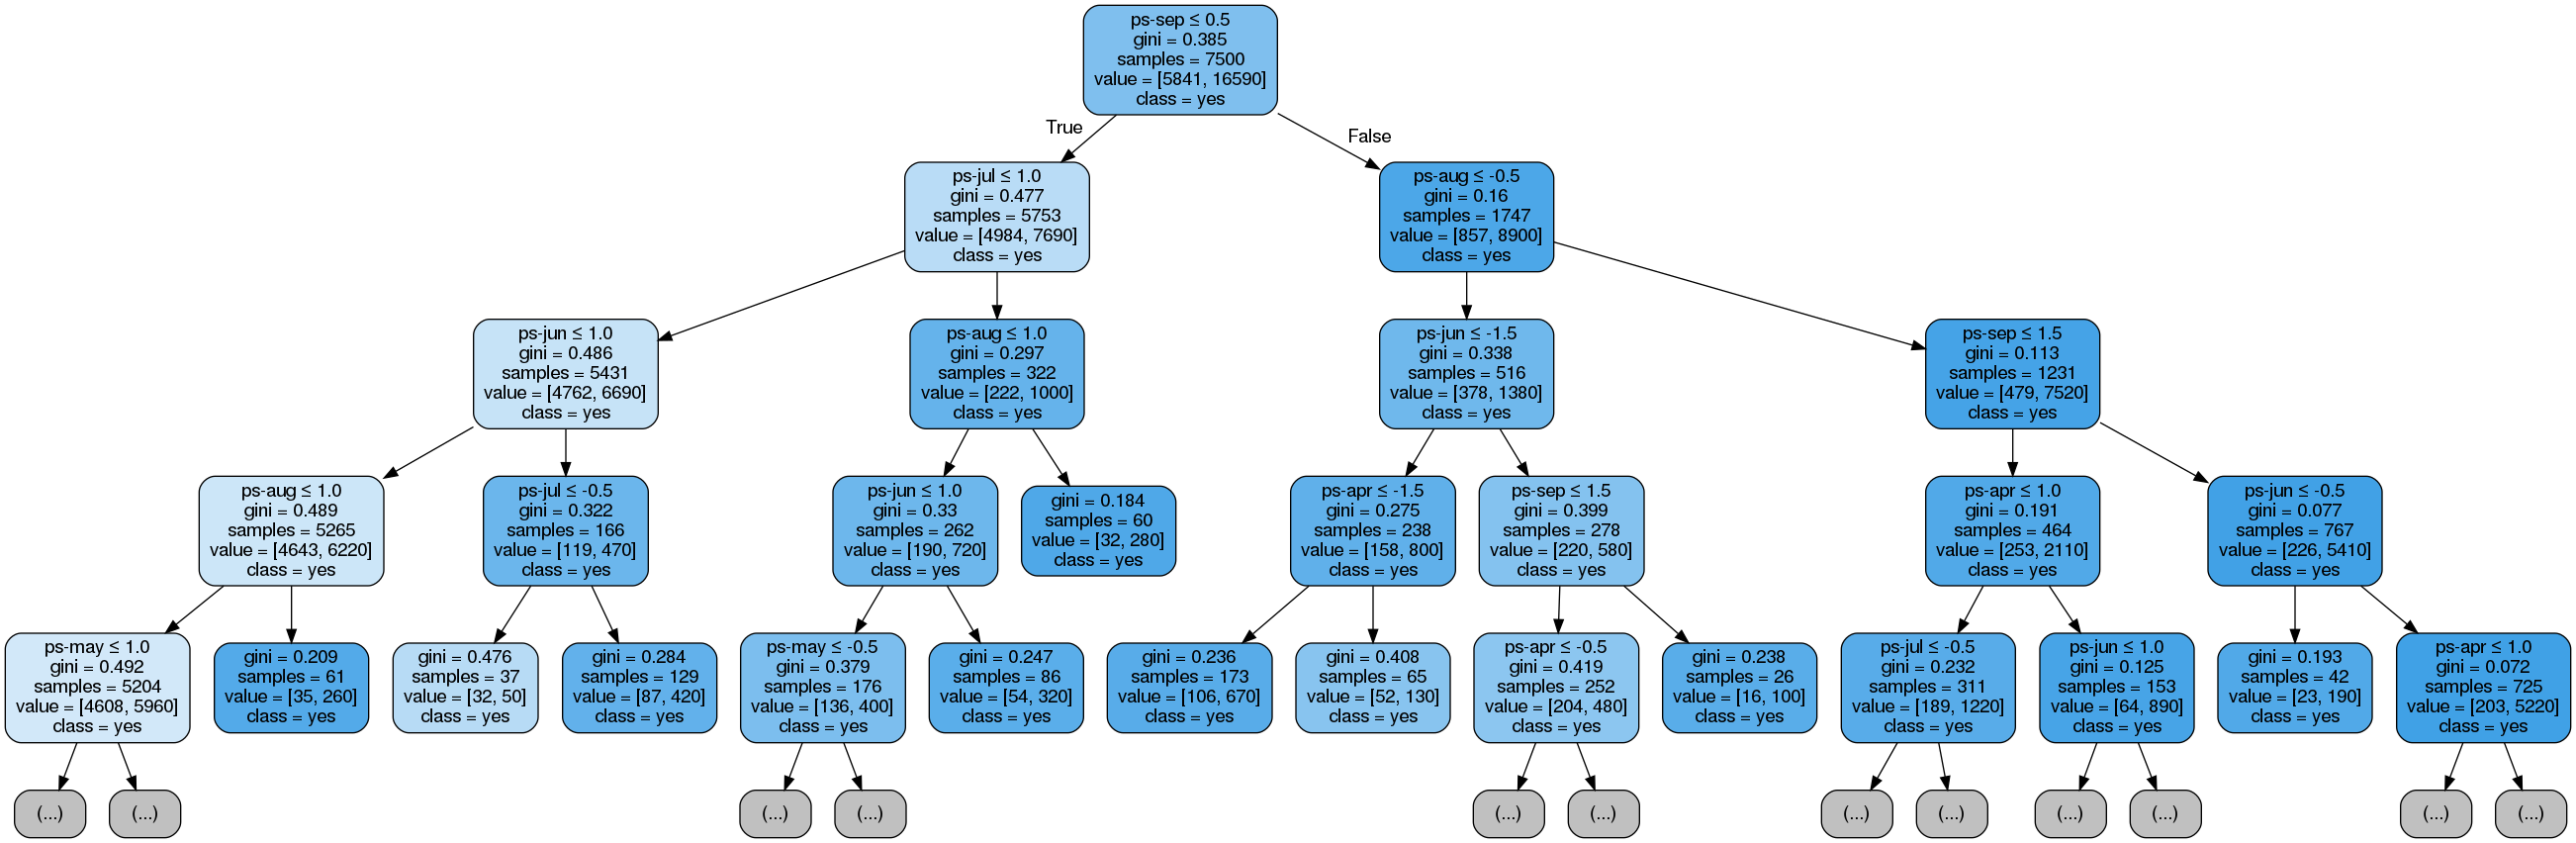

In [105]:
dot_data = tree.export_graphviz(clf,
                                out_file=None,
                                feature_names=attributes,
                                class_names=['no','yes'],
                                filled=True,
                                rounded=True,
                                max_depth=4,
                                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data)  
graph.write_png("tree.png")
Image(graph.create_png())

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import numpy

def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = numpy.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [ ]:

            
param_list = {'min_samples_split': [2, 5, 10, 20,100,150,250],
              'min_samples_leaf': [1, 5, 10, 20,100],
              'presort': [True],
              'criterion': ['gini', 'entropy'],
              'max_features': [None, 'log2', 'sqrt'],
              'min_impurity_decrease': [1e-6, 1e-7, 1e-8, 0],
              'max_depth': [None, 2,4,7,8,9]
             }

grid_search = GridSearchCV(clf, param_grid=param_list)
grid_search.fit(X, y)
clf = grid_search.best_estimator_
report(grid_search.cv_results_, n_top=3)

In [61]:
from sklearn.ensemble import RandomForestClassifier

In [127]:


'''clf = RandomForestClassifier(n_estimators=100, 
                             criterion='gini', 
                             max_depth=None, 
                             min_samples_split=150, 
                             min_samples_leaf=20)
criterion: [entropy, gini]
max_depth: [2-20, None]
min_impurity_decrease: [1e-6,5e-6,1e-7,5e-7,0]
n_estimators: [10,15,20,25,30]
18•
•
•
min_samples_split: [2-51]
min_samples_leaf: [2, 51]
class_weight: [balanced, None, {0: 0.3, 1: 0.7}
'''
clf = RandomForestClassifier()
param_list = {
                'n_estimators': [10,15,20],
                'min_samples_split': [150],
              'min_samples_leaf': [20],
              'criterion': ['gini'],
              'max_features': [None],
              'max_depth': [7],
                'class_weight': [{0:0.15,1:0.55}, {0:.55, 1:.15}]
             }

grid_search = GridSearchCV(clf, param_grid=param_list)
grid_search.fit(X, y)
clf = grid_search.best_estimator_

report(grid_search.cv_results_, n_top=3)

scores = cross_val_score(clf, X, y, cv=10)
print('Accuracy: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

scores = cross_val_score(clf, X, y, cv=10, scoring='f1_micro')
print('F1-score: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

scores = cross_val_score(clf, X, y, cv=10, scoring='recall_micro')
print('rec: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

scores = cross_val_score(clf, X, y, cv=10, scoring='precision_micro')
print('prec: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

clf.fit(X_train, y_train)

y_pred = clf.predict(X_train)
print('Accuracy train %s' % accuracy_score(y_train, y_pred))
print(classification_report(y_train, y_pred))

y_pred = clf.predict(X_test)
print('Accuracy test %s' % accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Model with rank: 1
Mean validation score: 0.791 (std: 0.005)
Parameters: {'min_samples_leaf': 20, 'n_estimators': 15, 'min_samples_split': 150, 'criterion': 'gini', 'max_features': None, 'max_depth': 7, 'class_weight': {0: 0.55, 1: 0.15}}

Model with rank: 2
Mean validation score: 0.788 (std: 0.005)
Parameters: {'min_samples_leaf': 20, 'n_estimators': 10, 'min_samples_split': 150, 'criterion': 'gini', 'max_features': None, 'max_depth': 7, 'class_weight': {0: 0.55, 1: 0.15}}

Model with rank: 3
Mean validation score: 0.788 (std: 0.000)
Parameters: {'min_samples_leaf': 20, 'n_estimators': 20, 'min_samples_split': 150, 'criterion': 'gini', 'max_features': None, 'max_depth': 7, 'class_weight': {0: 0.55, 1: 0.15}}

Accuracy: 0.7872 (+/- 0.01)
F1-score: 0.7874 (+/- 0.00)
rec: 0.7873 (+/- 0.00)
prec: 0.7878 (+/- 0.01)
Accuracy train 0.792533333333
             precision    recall  f1-score   support

          0       0.79      1.00      0.88      5841
          1       0.85      0.08      0.

In [132]:
clf = MLPClassifier(activation='relu', alpha=1e-7, solver='sgd')

clf.fit(X_train, y_train)

y_pred = clf.predict(X_train)
print('Accuracy train %s' % accuracy_score(y_train, y_pred))
print(classification_report(y_train, y_pred))

y_pred = clf.predict(X_test)
print('Accuracy test %s' % accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy train 0.822533333333
             precision    recall  f1-score   support

          0       0.84      0.96      0.89      5841
          1       0.69      0.36      0.47      1659

avg / total       0.81      0.82      0.80      7500

Accuracy test 0.8132
             precision    recall  f1-score   support

          0       0.83      0.95      0.89      1947
          1       0.65      0.33      0.44       553

avg / total       0.79      0.81      0.79      2500



In [12]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [134]:
clf = KNeighborsClassifier(n_neighbors=5)
param_list = {
    'n_neighbors': [55, 65, 100,150],
    'weights': ['distance']
    
}
grid_search = GridSearchCV(clf, param_grid=param_list)
grid_search.fit(X, y)
clf = grid_search.best_estimator_
report(grid_search.cv_results_, n_top=3)

scores = cross_val_score(clf, X, y, cv=10)
print('Accuracy: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

scores = cross_val_score(clf, X, y, cv=10, scoring='f1_micro')
print('F1-score: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

scores = cross_val_score(clf, X, y, cv=10, scoring='recall_micro')
print('rec: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

scores = cross_val_score(clf, X, y, cv=10, scoring='precision_micro')
print('prec: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))



clf.fit(X_train, y_train)

y_pred = clf.predict(X_train)
print('Accuracy train %s' % accuracy_score(y_train, y_pred))
print(classification_report(y_train, y_pred))

y_pred = clf.predict(X_test)
print('Accuracy test %s' % accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Model with rank: 1
Mean validation score: 0.813 (std: 0.002)
Parameters: {'n_neighbors': 100, 'weights': 'distance'}

Model with rank: 1
Mean validation score: 0.813 (std: 0.002)
Parameters: {'n_neighbors': 150, 'weights': 'distance'}

Model with rank: 3
Mean validation score: 0.813 (std: 0.003)
Parameters: {'n_neighbors': 65, 'weights': 'distance'}

Accuracy: 0.8157 (+/- 0.02)
F1-score: 0.8157 (+/- 0.02)
rec: 0.8157 (+/- 0.02)
prec: 0.8157 (+/- 0.02)
Accuracy train 0.841066666667
             precision    recall  f1-score   support

          0       0.85      0.96      0.90      5841
          1       0.75      0.42      0.54      1659

avg / total       0.83      0.84      0.82      7500

Accuracy test 0.8148
             precision    recall  f1-score   support

          0       0.84      0.94      0.89      1947
          1       0.65      0.36      0.46       553

avg / total       0.80      0.81      0.79      2500



In [28]:
from sklearn.naive_bayes import GaussianNB

In [118]:
n = 0.5
clf = GaussianNB(priors=[1-n, n])

In [119]:
scores = cross_val_score(clf, X, y, cv=10)
print('Accuracy: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

scores = cross_val_score(clf, X, y, cv=10, scoring='f1_macro')
print('F1-score: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

scores = cross_val_score(clf, X, y, cv=10, scoring='recall_macro')
print('rec: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

scores = cross_val_score(clf, X, y, cv=10, scoring='precision_macro')
print('prec: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))


clf.fit(X_train, y_train)

y_pred = clf.predict(X_train)
print('Accuracy train %s' % accuracy_score(y_train, y_pred))
print(classification_report(y_train, y_pred))

y_pred = clf.predict(X_test)
print('Accuracy test %s' % accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8019 (+/- 0.03)
F1-score: 0.7047 (+/- 0.04)
rec: 0.7000 (+/- 0.04)
prec: 0.7114 (+/- 0.04)
Accuracy train 0.804533333333
             precision    recall  f1-score   support

          0       0.87      0.89      0.88      5841
          1       0.56      0.52      0.54      1659

avg / total       0.80      0.80      0.80      7500

Accuracy test 0.7976
             precision    recall  f1-score   support

          0       0.86      0.88      0.87      1947
          1       0.55      0.51      0.53       553

avg / total       0.79      0.80      0.80      2500



In [55]:
param_list = {'max_depth': [None] + list(numpy.arange(2, 20)),
              'min_samples_split': [2, 5, 10, 20, 30, 50, 100],
              'min_samples_leaf': [1, 5, 10, 20, 30, 50, 100]
             }

random_search = RandomizedSearchCV(clf, param_distributions=param_list, n_iter=100)
random_search.fit(X, y)
clf = random_search.best_estimator_

ValueError: Invalid parameter min_samples_split for estimator GaussianNB(priors=[0.19999999999999996, 0.8]). Check the list of available parameters with `estimator.get_params().keys()`.

In [ ]:
report(random_search.cv_results_, n_top=3)